In [1]:
import torch
import torch.nn as nn
import mdl.md2l as mdl
from d2l import torch as d2l

# 深度循环神经网络
之前考虑的 `RNN` 只有单个隐藏层, 也就是 $\mathbf{H}_t$ 需要表示前面的 $t$ 长时间步隐藏的信息, 所以信息损失可能比较严重, 所以可以通过添加多个隐藏层的方式来解决这一个问题, 一个 $L$个隐藏层的深度循环神经网络结果如下, 每一个隐状态都可以连续地传递到当前层的下一个时间步和下一层的当前时间步:
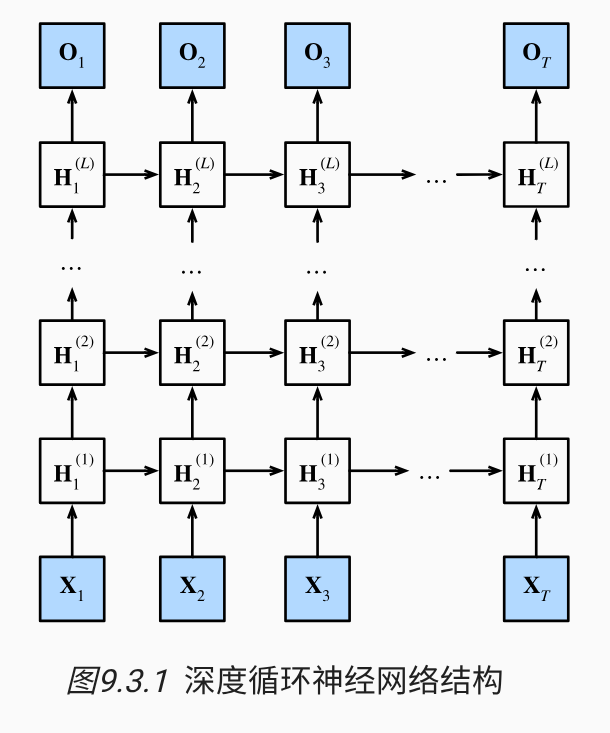

## 函数依赖关系
假设在时间步 $t$ 有一个小批量输入数据 $\mathbf{X}_t \in \mathbb{R}^{n \times d}$, 同时将第 $l$ 个隐藏层的隐状态设置为 $\mathbf{H}_t^{(l)} \in \mathbb{R}^{n \times h}$, 输出层变量设置为 $\mathbf{O}_t \in \mathbb{R}^{n \times q}$, 同时设置 $\mathbf{H}_t^{(0)} = \mathbf{X}_t$, 同时第 $l$ 个隐状态的隐状态使用激活函数 $\phi_l$, 那么:
$$
\mathbf{H}_t^{(l)} = \phi_l \bigl( \mathbf{H}_t^{(l-1)} \mathbf{W}_{xh}^{(l)} + \mathbf{H}_{t-1}^{(l)} \mathbf{W}_{hh}^{(l)} + \mathbf{b}_h^{(l)} \bigr),
$$
其中权重 $\mathbf{W}_{xh}^{(l)} \in \mathbb{R}^{h \times h}, \mathbf{W}_{hh}^{(l)} \in \mathbb{R}^{h \times h}$ 和偏置 $\mathbf{b}_h^{(l)} \in \mathbb{R}^{1 \times h}$ 都是第 $l$ 个隐藏层的模型参数, 并且最终使用一个线性层来计算最终的输出:
$$
\mathbf{O}_t = \mathbf{H}_t^{(L)} \mathbf{W}_{hq} + \mathbf{b}_q,
$$
其中权重 $\mathbf{W}_{hq} \in \mathbb{R}^{h \times q}$ , 以及偏置 $\mathbf{b}_q \in \mathbb{R}^{1 \times q}$, 并且其中隐藏层数目 $L$ 以及隐藏单元数目 $h$ 都是超参数 ; 同时可以使用 `GRU, LSTM` 的隐状态的计算方法来代替这些循环单元(那网络比较复杂了, 此时需要传递的除了 $\mathbf{H}_t$ 还有 $\mathbf{C}_t$)

## 深度循环神经网络实现

In [2]:
# 数据准备
batch_size, num_steps = 32, 35
train_iter, vocab = mdl.load_data_time_machine(batch_size, num_steps)

In [3]:
# 参数准备
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers)

In [4]:
# 模型初始化
model = mdl.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

困惑度 1.0, 17929.1 词元/秒 cpu
time travelleryou can show black is white by argument said filby
traveller with a slight accession ofcheerfulness really thi


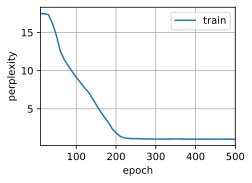

In [5]:
# 模型训练以及预测
num_epochs, lr = 500, 2
mdl.train_ch8(model, train_iter, vocab, lr*1.0, num_epochs, device)